# Contexto

A detecção de fraudes também relacionada a detecção de anomalias tem como objetivo identificar atividades ou padrões não usuais (incomuns). Por exemplo, para o setor financeiro: falsificação de assinaturas em cheques, clonagem de cartões de crédito, lavagem de dinheiro, declarar falência propositalmente (bankruptcy), etc.

O objeto desde notebook é mostrar como funciona a identificação destas transações fraudulentas e quais os principais desafios enfrentados com esse tipo de análise.

## 1. Desafio - Dados desbalanceados

Um dos principais desafios da análise de fraudes é o desbalanceamento dos dados, as fraudes geralmente representam uma parcela ínfima do total de transações, dado isso é necessário tratar os dados.


Antes de iniciar o notebook adicione o dataset [Kaggle - Credit Card Fraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dentro do drive na pasta **/Colab Notebooks/Datasets/**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import Counter
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')
data = data.drop_duplicates()
total = len(data.values)
normal = len(data[data['Class'] == 0])
fraud = len(data[data['Class'] == 1])
fraudpercentage = round((fraud/total)*100, 2)
normalpercentage = round((normal/total)*100, 2)

print('Total de transações:', total)
print('Total de transações legítimas:', normal)
print('Total de transações fraudulentas:', fraud)
print('Porcentagem de transações legítimas:', normalpercentage, '%')
print('Porcentagem de transações fraudulentas:', fraudpercentage, '%')

Total de transações: 283726
Total de transações legítimas: 283253
Total de transações fraudulentas: 473
Porcentagem de transações legítimas: 99.83 %
Porcentagem de transações fraudulentas: 0.17 %


([<matplotlib.patches.Wedge at 0x7f08f3e1b3d0>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'Normal'),
  Text(1.099984914296047, -0.005760930577456522, 'Fraude')],
 [Text(-0.5999917712457308, 0.0031423617568128656, '99.83'),
  Text(0.5999917714342073, -0.003142325769521739, '0.17')])

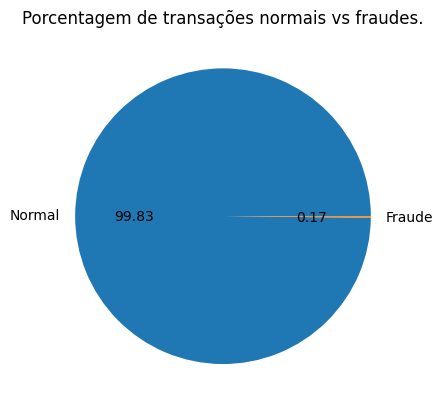

In [ ]:
import matplotlib.pyplot as plt

labels = "Normal", "Fraude"
sizes = data["Class"].value_counts()

fig, ax = plt.subplots()
ax.set_title("Porcentagem de transações normais vs fraudes.")
ax.pie(sizes, labels=labels, autopct="%.2f")

### SMOTE

>**S**ynthetic **M**inority **O**versampling **T**echnique é uma estratégia de oversampling baseada em vizinhos mais próximos para selecionar os objetos as serem amostrados.

A vizinha de um objeto geralmente é dado por uma mediade de dissimilaridade, também denominada de distância. Tipicamente, a distância euclidiana é utilizada para calcular a distância entre dois objetos $x_1$ e $x_2$,como:
$$ dist(x_1,x_2) = { \sqrt{\sum_{i=1}^{d} (x_1^i - x_2^i)^2} } $$


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Class'], axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                # 80% Treino | 20% Teste
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)      # 80% Teste  | 20% Validação

print('Training set:')
attributes = pd.DataFrame(X_train)
labels = pd.Series(y_train, name='Class')
df_train = pd.concat([attributes, labels], axis=1)
class_counts = df_train["Class"].value_counts()
print(class_counts)

Training set:
0    181275
1       309
Name: Class, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

smote = BorderlineSMOTE(k_neighbors=3,m_neighbors=2,sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

df_balanceado = X_smote.copy()
df_balanceado['Class'] = y_smote.copy()

([<matplotlib.patches.Wedge at 0x7f08c83d5ba0>,
 [Text(6.735557395310444e-17, 1.1, 'Normal'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraude')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

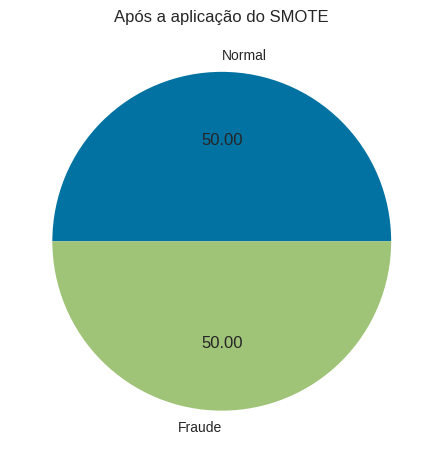

In [ ]:
import matplotlib.pyplot as plt

labels = "Normal", "Fraude"
sizes = df_balanceado["Class"].value_counts()

fig, ax = plt.subplots()
ax.set_title("Após a aplicação do SMOTE")
ax.pie(sizes, labels=labels, autopct="%.2f")

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


<Axes: >

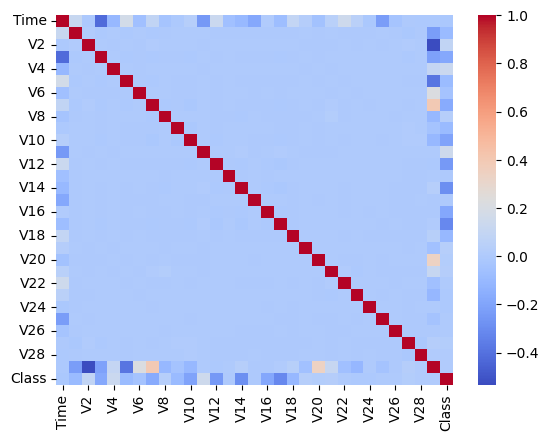

In [ ]:
import seaborn as sns

corr_matrix = data.corr()
print(corr_matrix.columns)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

<Axes: >

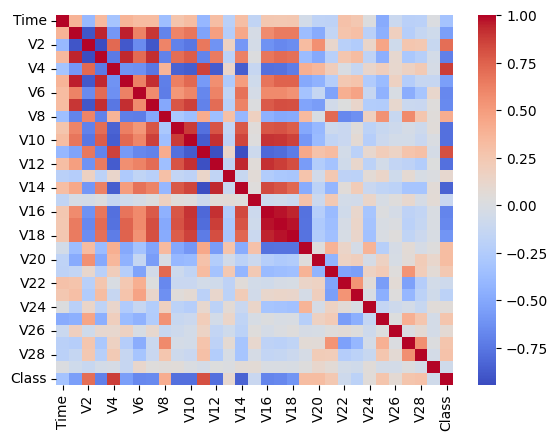

In [ ]:
corr_matrix = df_balanceado.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

Text(0.5, 1.0, 'Correlação Positiva do V11 vs Fraude')

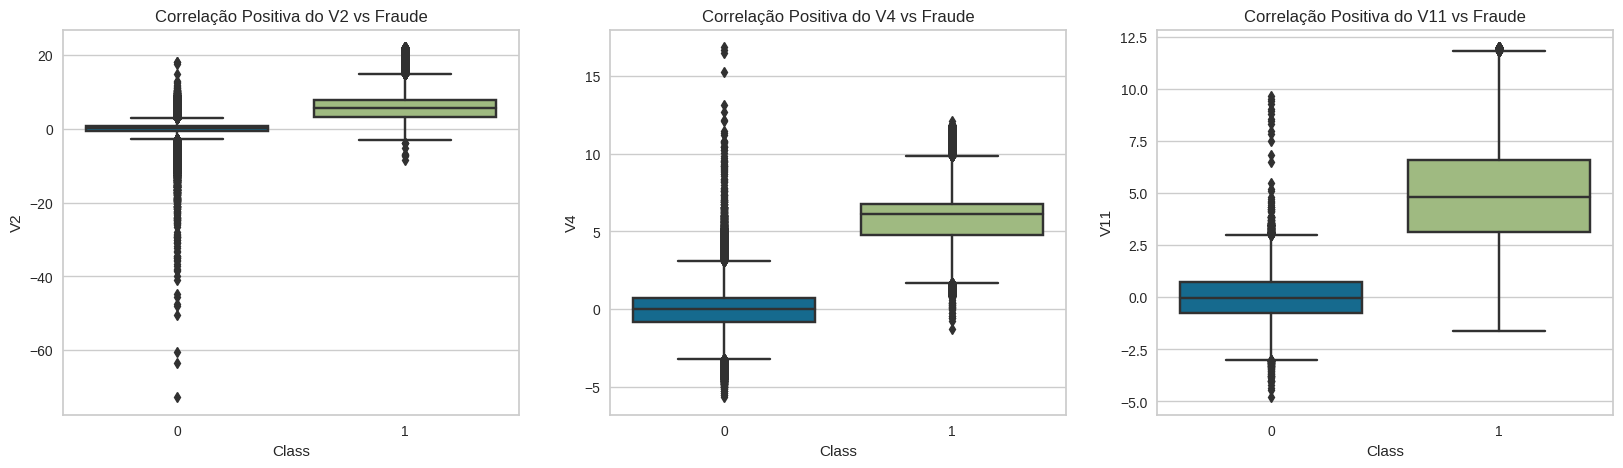

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.boxplot(x="Class", y="V2", data=df_balanceado, ax=axes[0])
sns.boxplot(x="Class", y="V4", data=df_balanceado, ax=axes[1])
sns.boxplot(x="Class", y="V11", data=df_balanceado, ax=axes[2])

axes[0].set_title('Correlação Positiva do V2 vs Fraude')
axes[1].set_title('Correlação Positiva do V4 vs Fraude')
axes[2].set_title('Correlação Positiva do V11 vs Fraude')

Text(0.5, 1.0, 'Correlação Negativa do V14 vs Fraude')

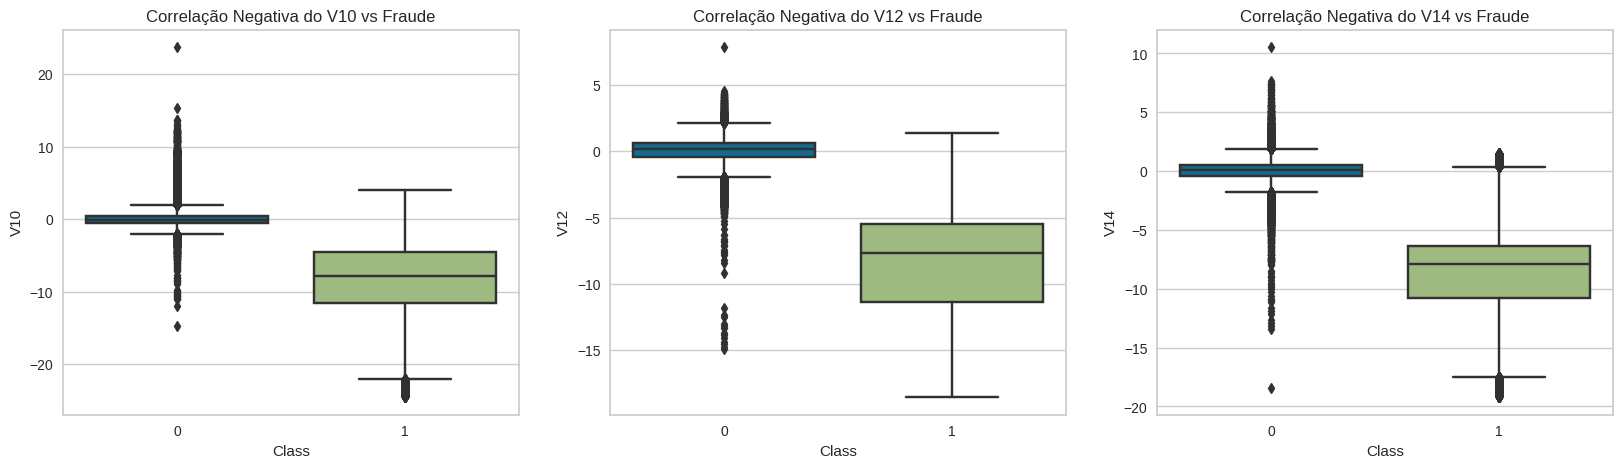

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.boxplot(x="Class", y="V10", data=df_balanceado, ax=axes[0])
sns.boxplot(x="Class", y="V12", data=df_balanceado, ax=axes[1])
sns.boxplot(x="Class", y="V14", data=df_balanceado, ax=axes[2])

axes[0].set_title('Correlação Negativa do V10 vs Fraude')
axes[1].set_title('Correlação Negativa do V12 vs Fraude')
axes[2].set_title('Correlação Negativa do V14 vs Fraude')

<ipython-input-17-182cca8f0d1e>:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


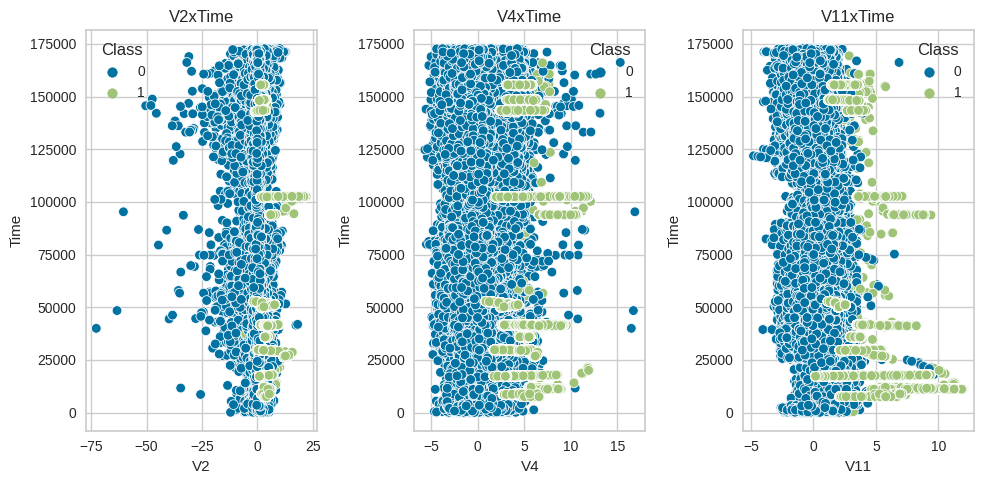

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.scatterplot(x='V2', y='Time', hue='Class', data=df_balanceado,ax=axes[0])
sns.scatterplot(x='V4', y='Time', hue='Class', data=df_balanceado,ax=axes[1])
sns.scatterplot(x='V11', y='Time', hue='Class', data=df_balanceado,ax=axes[2])
axes[0].set_title('V2xTime')
axes[1].set_title('V4xTime')
axes[2].set_title('V11xTime')
plt.tight_layout()
plt.show()

<ipython-input-18-78c33612177c>:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


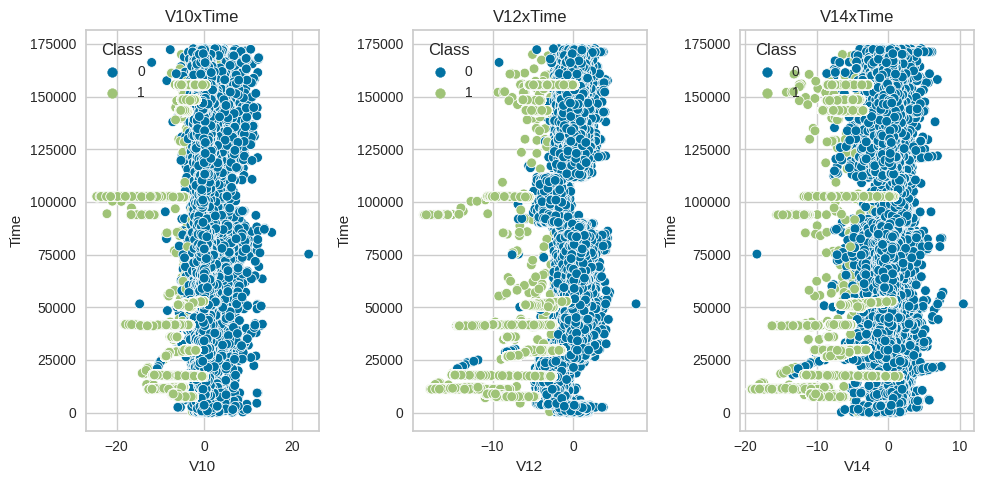

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.scatterplot(x='V10', y='Time', hue='Class', data=df_balanceado,ax=axes[0])
sns.scatterplot(x='V12', y='Time', hue='Class', data=df_balanceado,ax=axes[1])
sns.scatterplot(x='V14', y='Time', hue='Class', data=df_balanceado,ax=axes[2])
axes[0].set_title('V10xTime')
axes[1].set_title('V12xTime')
axes[2].set_title('V14xTime')
plt.tight_layout()
plt.show()

## 2. Desafio - Explicação do modelo

É necessário não somente fazer um modelo que possua boas métricas, mas também explicar como se chegou a essa conclusão. Para isso estaremos utilizando inicialmente o Decision Tree Classifier para entender o comportamento das decisões e posteriormente o Random Forest para melhorar a perfomance do nosso modelo.

### Aplicação do algoritmo Decision Tree Classifier

Esse algoritmo serve para analisar as métricas de decisão através de árvores, apesar de ser excelente para obter uma compreensão dos modelos, ele acaba por escutar muitos ruídos, causando overfitting nos dados.

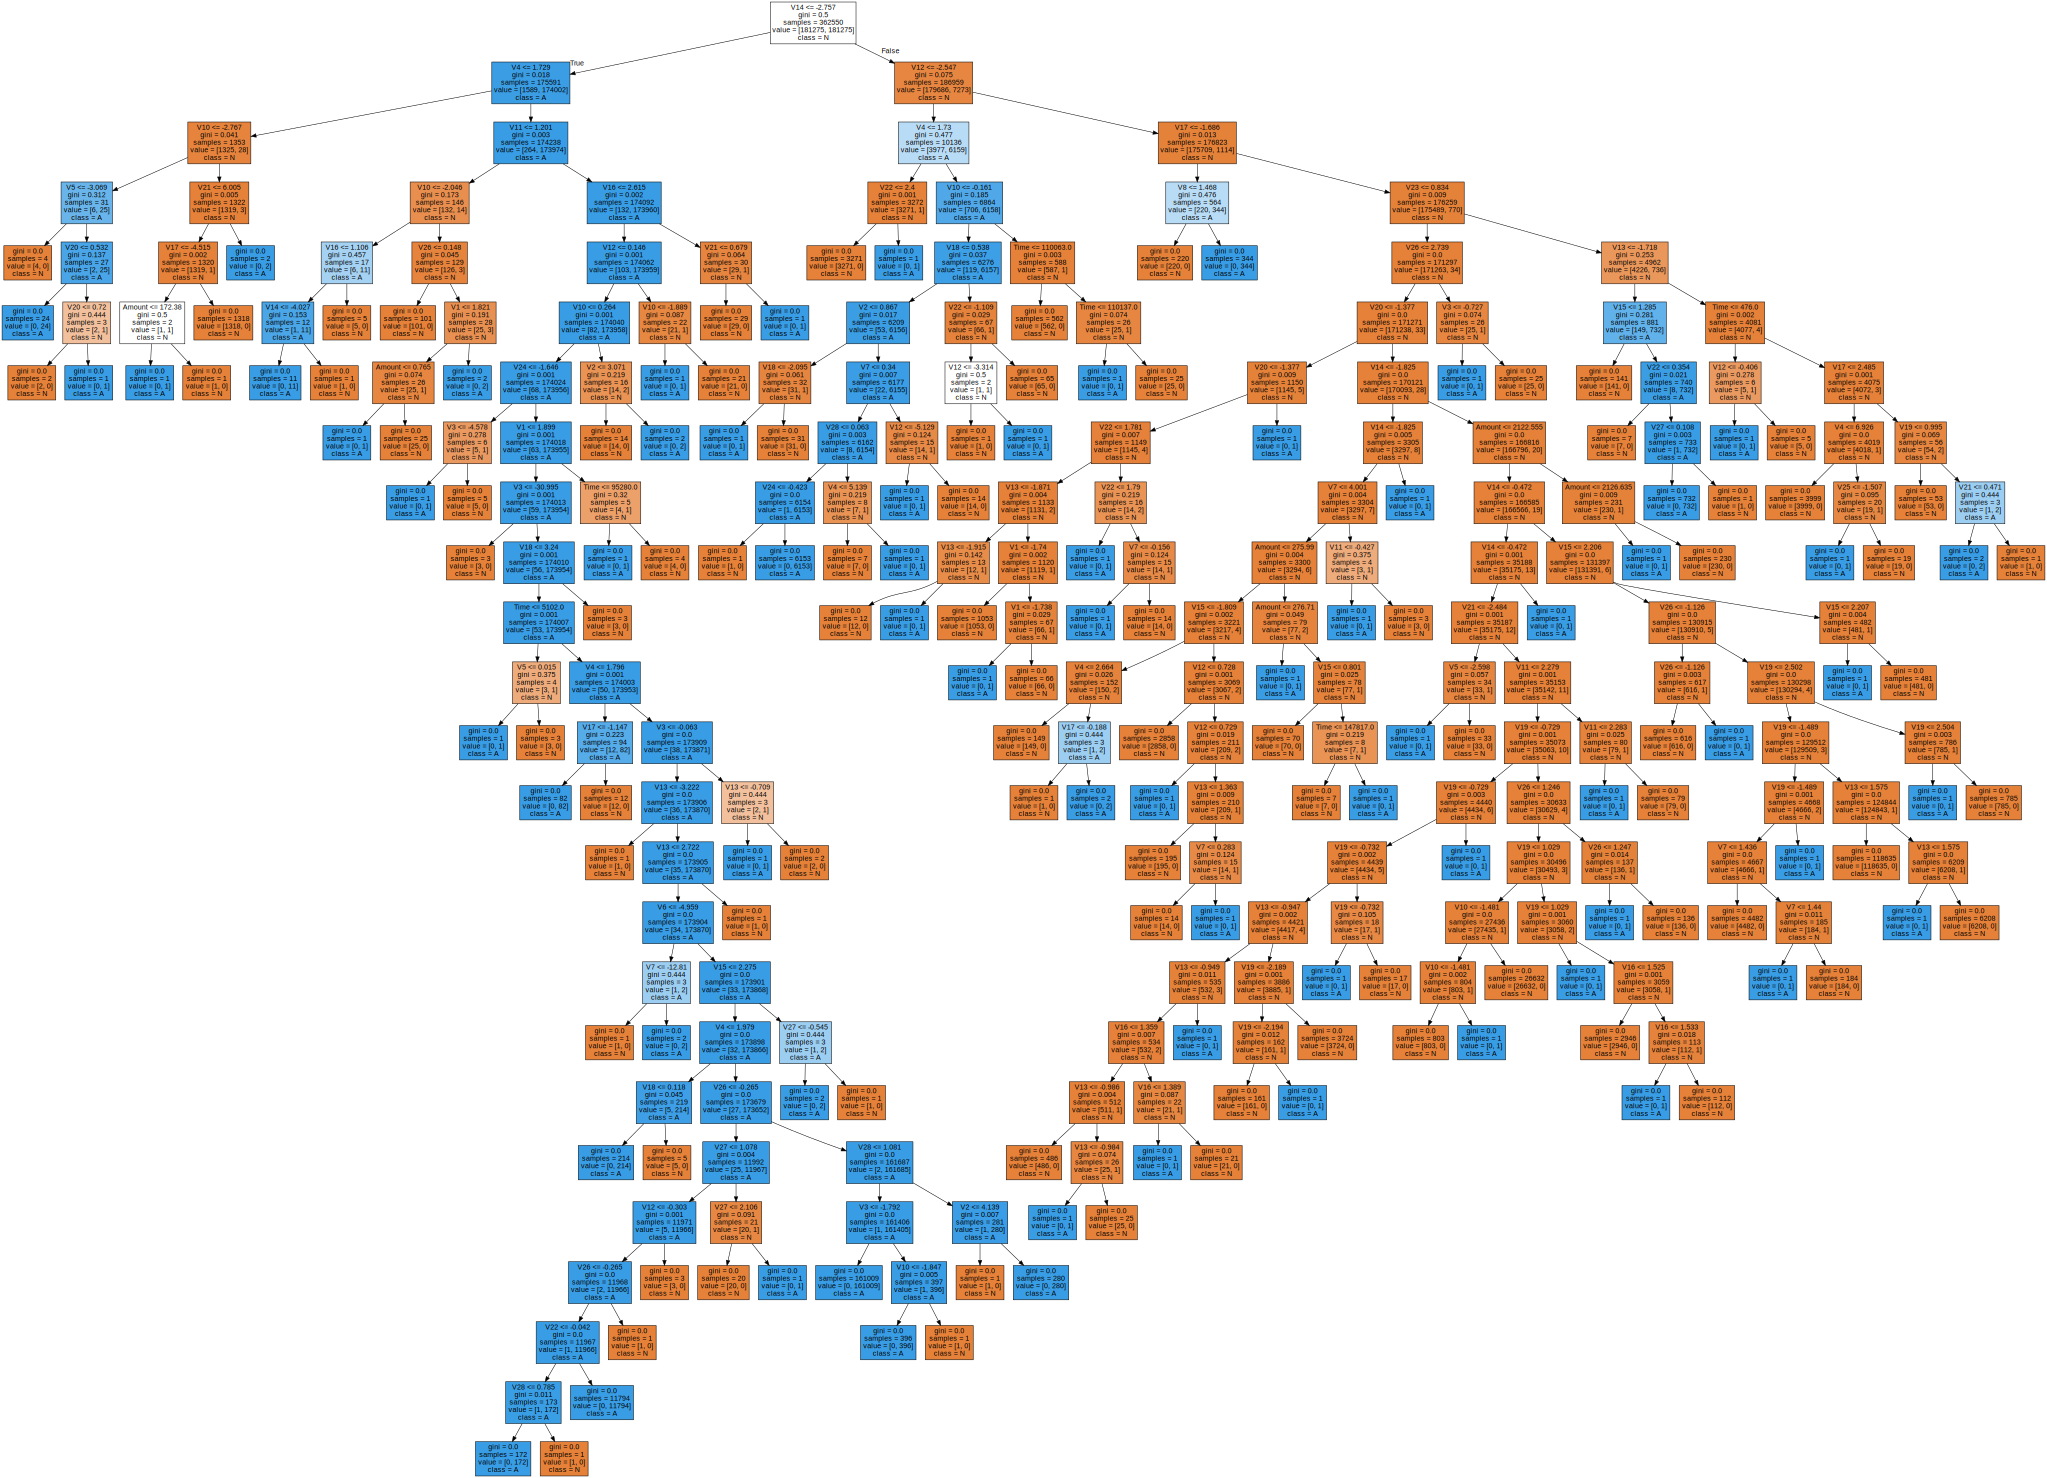

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced

model = DecisionTreeClassifier()
model.fit(X_smote, y_smote)

dot_data = export_graphviz(model,
                           feature_names=df_balanceado.columns.drop('Class'),
                           class_names=['N', 'A'], filled=True)

graph = graphviz.Source(dot_data)
graph

#### Dados de treino vs Dados de validação

É possível notar que esse algoritmo acabou causando um overfitting, onde os dados de treino obtiveram resultados melhores em relação a base de dados de validação.

In [ ]:
y_pred = model.predict(X_train)
print('BL para dados treinados\n:',classification_report(y_train, y_pred))

print('IMBL para dados treinados\n:',classification_report_imbalanced(y_train, y_pred))

print('\n---\n')

y_pred = model.predict(X_val)
print('BL para dados de validação\n:',classification_report(y_val, y_pred))

print('IMBL para dados de validação\n:',classification_report_imbalanced(y_val, y_pred))

BL para dados treinados
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181275
           1       1.00      1.00      1.00       309

    accuracy                           1.00    181584
   macro avg       1.00      1.00      1.00    181584
weighted avg       1.00      1.00      1.00    181584

IMBL para dados treinados
:                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    181275
          1       1.00      1.00      1.00      1.00      1.00      1.00       309

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    181584


---

BL para dados de validação
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45322
           1       0.71      0.74      0.73        74

    accuracy                           1.00     45396
   macro avg       0.86      0.

### Aplicação do algoritmo Random Forest


Em resumo, o Random Forest irá criar múltiplas árvores de decisão de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação.

A aplicação desse algoritmo melhora bastante o resultado em comparação a uma única Decision Tree, diminuindo o overfitting dos dados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error
from math import sqrt

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_smote, y_smote);

y_pred = rf.predict(X_train)
print('BL para dados treinados\n:',classification_report(y_train, y_pred))

print('IMBL para dados treinados\n:',classification_report_imbalanced(y_train, y_pred))

print('\n---\n')

y_pred = rf.predict(X_val)
print('BL para dados de validação\n:',classification_report(y_val, y_pred))

print('IMBL para dados de validação\n:',classification_report_imbalanced(y_val, y_pred))

BL para dados treinados
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181275
           1       1.00      1.00      1.00       309

    accuracy                           1.00    181584
   macro avg       1.00      1.00      1.00    181584
weighted avg       1.00      1.00      1.00    181584

IMBL para dados treinados
:                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    181275
          1       1.00      1.00      1.00      1.00      1.00      1.00       309

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    181584


---

BL para dados de validação
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45322
           1       0.95      0.82      0.88        74

    accuracy                           1.00     45396
   macro avg       0.98      0.

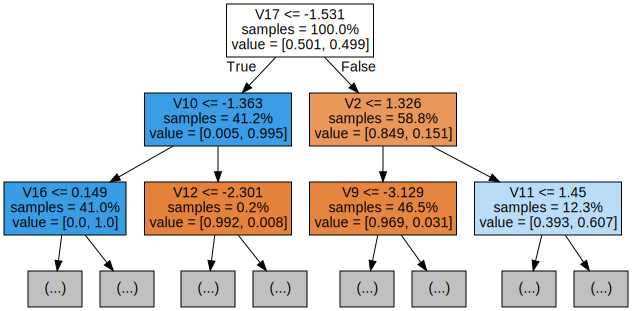

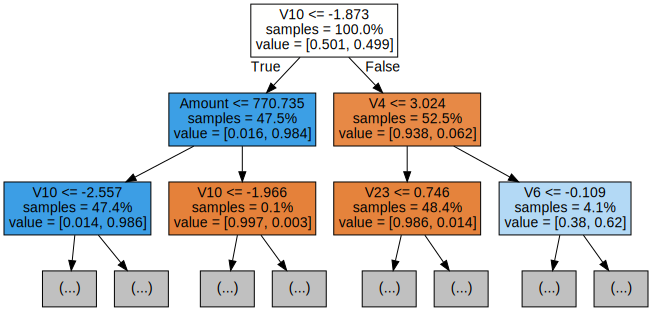

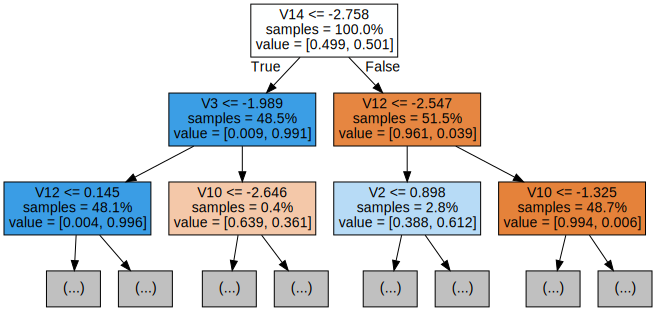

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<Axes: >

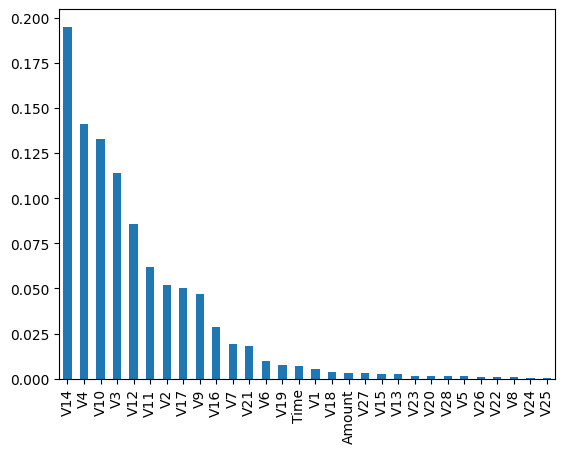

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

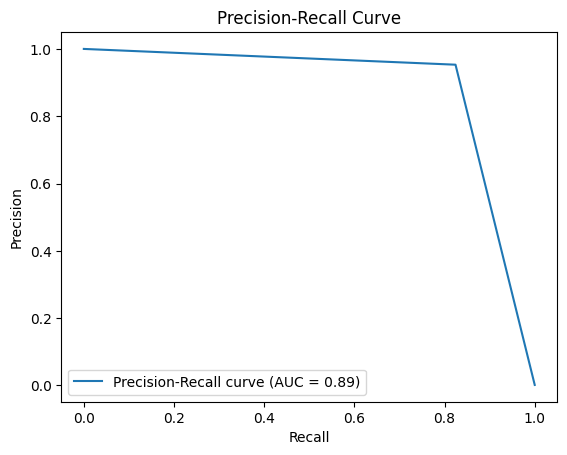

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_val, y_pred)
auc_pr = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


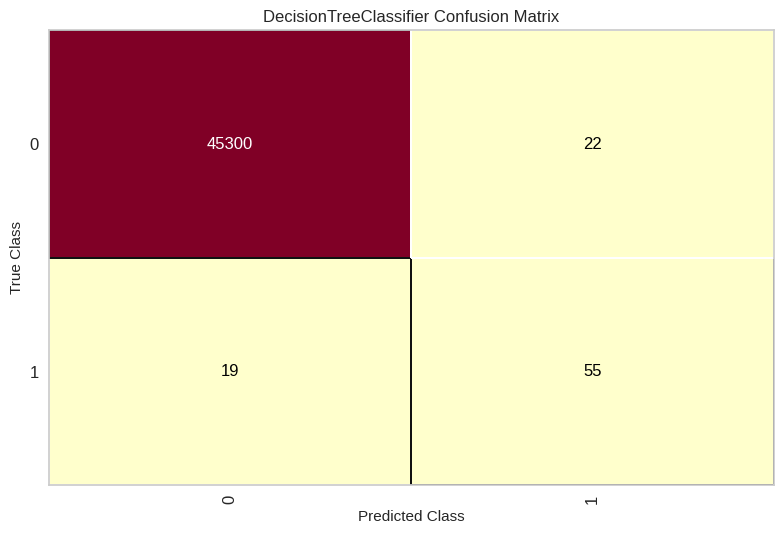

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm_viz = ConfusionMatrix(model)
cm_viz.score(X_val, y_val)
cm_viz.show()

#### Aprimorando o algoritmo Random Forest

É importante utilizar o Hyperparameter Tuning para conseguir extrair os melhores parâmetros de treinamento para o modelo, abaixo estaremos utilizando o RandomSearchCV, cuja ação é selecionar parâmetros randômicos em determinado range para chegar ao parâmetro mais eficiente.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(5,80),
              'max_depth': randint(8,30)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(X_smote, y_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dae396696f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dae3b072ec0>})

In [ ]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 45}


In [ ]:
y_pred = best_rf.predict(X_train)
print('BL para dados treinados\n:',classification_report(y_train, y_pred))

print('IMBL para dados treinados\n:',classification_report_imbalanced(y_train, y_pred))

print('\n---\n')

y_pred = best_rf.predict(X_val)
print('BL para dados de validação\n:',classification_report(y_val, y_pred))

print('IMBL para dados de validação\n:',classification_report_imbalanced(y_val, y_pred))

BL para dados treinados
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181275
           1       0.99      0.96      0.97       309

    accuracy                           1.00    181584
   macro avg       0.99      0.98      0.99    181584
weighted avg       1.00      1.00      1.00    181584

IMBL para dados treinados
:                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.96      1.00      0.98      0.96    181275
          1       0.99      0.96      1.00      0.97      0.98      0.96       309

avg / total       1.00      1.00      0.96      1.00      0.98      0.96    181584


---

BL para dados de validação
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45322
           1       0.91      0.85      0.88        74

    accuracy                           1.00     45396
   macro avg       0.96      0.

<Axes: >

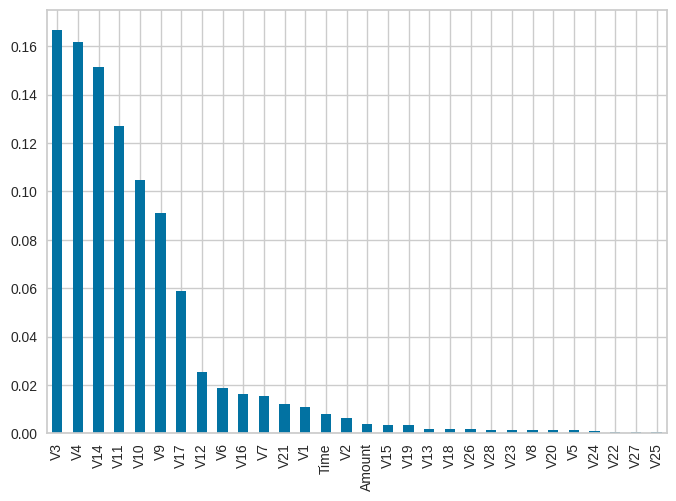

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

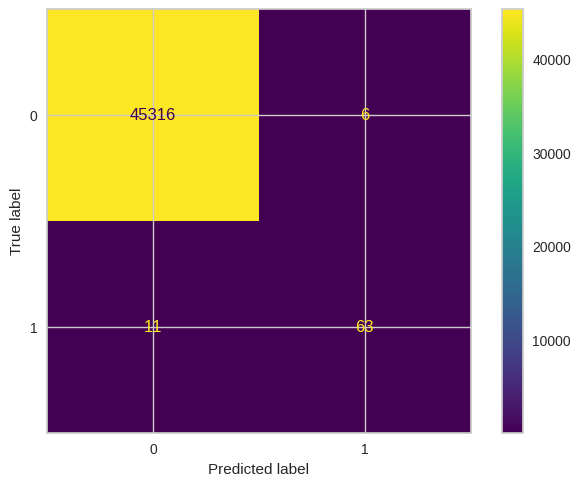

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## 3. Desafio - Aplicando o modelo

Por fim resta a aplicação desse modelo em um cenário real, para isso desenhamos a arquitetura abaixo para gerenciamento e aplicação dos modelos.


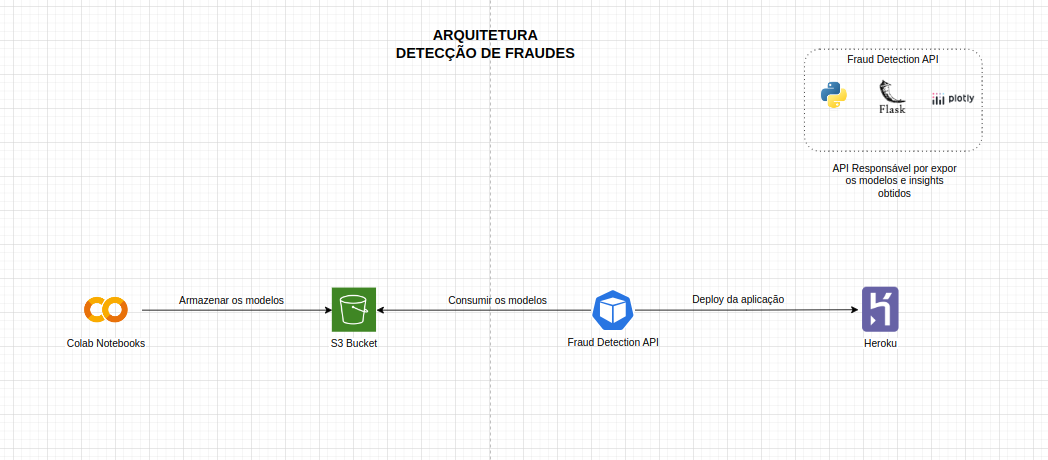


**Fluxo de informação**
1. Treinar os modelos

> Os modelos serão treinados nos notebooks e salvos através da dependência [pickle](https://docs.python.org/3/library/pickle.html).


2. Guardar os modelos

> Os modelos serão armazenados em buckets na AWS S3.


3. Acessar os modelos

> Os modelos serão acessados com [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-creating-buckets.html) através da API.

In [ ]:
!pip3 install boto3==1.28.2 python-dotenv

In [ ]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [ ]:
import logging
import boto3
from botocore.exceptions import ClientError
import os

s3_client = boto3.client(
    's3',
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY')
)

def upload_file(file_name, bucket, object_name=None):
    """Upload a file to an S3 bucket

    :param file_name: File to upload
    :param bucket: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    :return: True if file was uploaded, else False
    """

    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)

    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

In [ ]:
import pickle

bucket = 'fraud-detection-models'

def save_model_to_s3(trained_model, model_name):
  model_name = f"{model_name}.pkl"
  pickle.dump(trained_model, open(model_name, 'wb'))
  upload_file(model_name, bucket)

save_model_to_s3(best_rf, 'random-forest-model')